In [6]:
import os
import sys
import shutil
import glob
import re
import cv2 as cv
from osgeo import gdal

import matplotlib.pyplot as plt
plt.ion()

In [2]:
glob.glob('files_from_lynn/charts/*-v5.nc')

['files_from_lynn/charts\\asi-n6250-20090322-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20100125-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20100403-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20100405-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20101205-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20101213-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20101221-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20110223-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20110319-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20110405-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20110627-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20110701-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20110702-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20110705-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20110730-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20110731-v5.nc',
 'files_from_lynn/charts\\asi-n6250-20110903-v5.nc']

In [10]:
# move the chart files over
base_folder = 'training_data'
chart_folder = os.path.join(base_folder, 'charts')
os.makedirs(chart_folder, exist_ok=True)
for file_path in glob.glob('files_from_lynn/charts/*-v5.nc'):
    shutil.copy(file_path, os.path.join(chart_folder, os.path.basename(file_path)))

In [3]:
p = r"C:\Users\clvco\URA_W18\files_from_lynn\RS2_OK4491_PK59492_DK57897_SCWA_20090322_102729_HH\RS2_OK4491_PK59492_DK57897_SCWA_20090322_102729_HH.tif"

In [7]:
data = gdal.Open(p)

In [19]:
band0 = data.GetRasterBand(2)

In [13]:
band1 = data.GetRasterBand(1)

In [21]:
arr = band0.ReadAsArray()

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

In [5]:
cv.imread(p, 0)

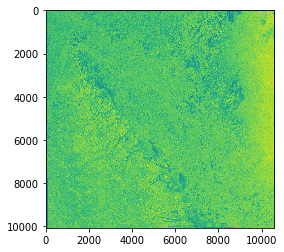

In [17]:
plt.imshow(arr)

In [11]:
# we want to now move the other data over
HH_folder = os.path.join(base_folder, 'images_HH')
HV_folder = os.path.join(base_folder, 'images_HV')
os.makedirs(HH_folder, exist_ok=True)
os.makedirs(HV_folder, exist_ok=True)


In [22]:
# then we want to find the corresponding HH and HV images!
HH_images = glob.glob(os.path.join('files_from_lynn/**/*HH*.tif'))
HH_dates = [date_extractor.findall(HH) for HH in HH_images]


In [25]:
# then we want to find the corresponding HH and HV images!
HV_images = glob.glob(os.path.join('files_from_lynn/**/*HV*.tif'))
HV_dates = [date_extractor.findall(HV) for HV in HV_images]


In [26]:
HV_dates

[['20100403'],
 ['20100405'],
 ['20101205'],
 ['20101213'],
 ['20101221'],
 ['20110223'],
 ['20110319'],
 ['20110405'],
 ['20110702'],
 ['20110705'],
 ['20110730'],
 [],
 []]

In [27]:
len(HV_dates)

13

In [24]:
HH_images

['files_from_lynn\\mack_delta_20100403_153047\\imagery_HH.tif',
 'files_from_lynn\\mack_delta_20100405_161248\\imagery_HH.tif',
 'files_from_lynn\\RS2_OK16346_PK175175_DK165498_SCWA_20101205_123723\\imagery_HH.tif',
 'files_from_lynn\\RS2_OK16354_PK179351_DK169231_SCWA2_20101213_12002\\imagery_HH.tif',
 'files_from_lynn\\RS2_OK16362_PK178543_DK168426_SCWA_20101221_113456\\imagery_HH.tif',
 'files_from_lynn\\RS2_OK17848_PK192681_DK182068_SCWA_20110223_102630\\imagery_HH.tif',
 'files_from_lynn\\RS2_OK18512_PK199288_DK187107_SCWA_20110319_102405\\imagery_HH.tif',
 'files_from_lynn\\RS2_OK18880_PK204461_DK191759_SCWA_20110405_102704\\imagery_HH.tif',
 'files_from_lynn\\RS2_OK20363_PK220382_DK203551_SCWA_20110627_231340\\imagery_HH.tif',
 'files_from_lynn\\RS2_OK20363_PK220383_DK203552_SCWA_20110627_231455\\imagery_HHa.tif',
 'files_from_lynn\\RS2_OK20377_PK221691_DK205228_SCWA_20110702_141950\\imagery_HH.tif',
 'files_from_lynn\\RS2_OK20380_PK223932_DK207662_SCWA_20110705_224126\\imagery_

In [23]:
HH_dates

[['20100403'],
 ['20100405'],
 ['20101205'],
 ['20101213'],
 ['20101221'],
 ['20110223'],
 ['20110319'],
 ['20110405'],
 ['20110627'],
 ['20110627'],
 ['20110702'],
 ['20110705'],
 ['20110730'],
 ['20110731'],
 ['20090322'],
 ['20090322'],
 ['20090322'],
 ['20090322'],
 [],
 []]

In [18]:
date_extractor = re.compile(r'.*_(20\d\d\d\d\d\d)_*.*')

In [20]:
date_extractor.findall(HH_images[0])

['20100403']